## Nafiz Emir Eğilli - FERM 524 - Data Analytics and Statistical Learning - Homework I

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.formula.api import ols

C:\Users\emir.e\Anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Q1-) Load SimpsonsParadox.csv file into a data frame

In [2]:
df = pd.read_csv('SimpsonsParadox.csv',index_col=0)
df

,x,y,z
0,-0.412190,-0.682722,a
1,0.532536,-0.526555,a
2,0.493879,2.059458,a
3,0.171357,-0.737485,a
4,-0.337198,0.679261,a
...,...,...,...
295,-5.488985,2.759898,c
296,-4.818147,4.305835,c
297,-3.148152,4.694130,c
298,-3.142995,4.828707,c


## Q1A-) Create a scatter plot of x and y and calculate the Pearson’s Correlation coefficient between x and y. Interpret the plot and correlation coefficient


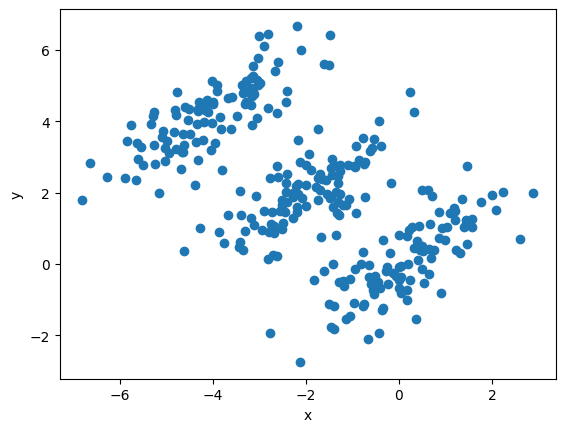

-0.5206850733760712

In [3]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
df['x'].corr(df['y'])

### COMMENT: There's a negative correlation between x and y

## Q1B-) Now check the correlation coefficient and plot for each subset represented by categorical variable z. Interpret these and compare with your earlier finding.

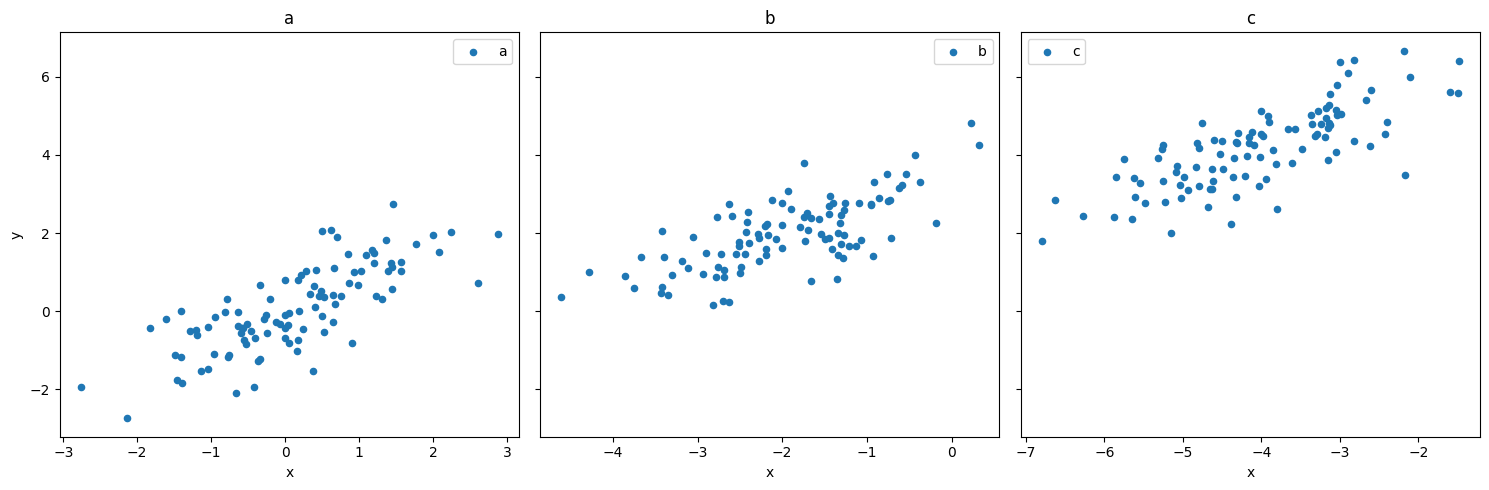

 correlation for a 0.7682627818855204
 correlation for b 0.7136337350673608
 correlation for c 0.768963887971151


In [4]:
grouped = df.groupby('z')
fig, axs = plt.subplots(1, len(grouped), figsize=(15, 5), sharey=True)
for (category, group), ax in zip(grouped, axs):
    group.plot(x='x', y='y', kind='scatter', label=category, ax=ax)
    ax.set_title(category)
plt.tight_layout()
plt.show()

grouped = df.groupby('z')
for category, group in grouped:
    correlation = group['x'].corr(group['y'])
    print(f' correlation for {category} {correlation}')

### COMMENT: Contrarian to our previous finding, we can see strong positive correlations when x and y is categorized by a, b and c. 

## Q1C-) Use seaborn lmplot with and without hue attribute set to z variable to confirm your findings.

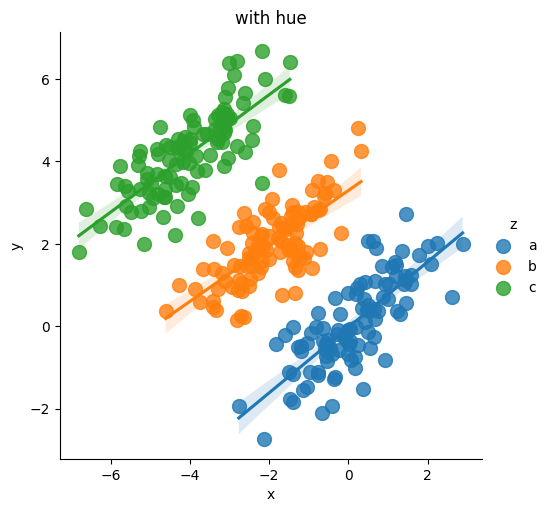

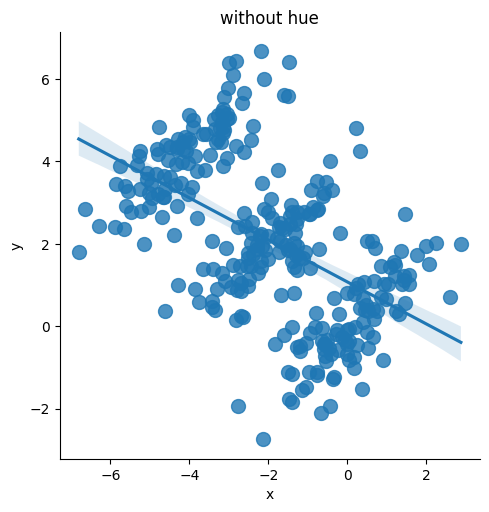

In [5]:
sns.lmplot(data=df, x='x', y='y', hue = 'z', scatter_kws={'s':100})
plt.title('with hue')
plt.show()

sns.lmplot(data=df, x='x', y='y', scatter_kws={'s':100})
plt.title('without hue')
plt.show()

### COMMENT: Plots also verify our findings in previous step, as the a, b and c classification shows positive correlation, while without hue (without classification) we obtain negative correlation in x to y.

## Q2-) Using numpy package create random number generators and standard normal random numbers as described below. (hint: check numpy.random.default_rng() documentation for how to do it)

## Q2A-) Create a two random number generator rng1 and rng2 with the same seed value and generate a set of 10 standard normal random numbers from both rng1 and rng2. What do you observe?


In [6]:
seed1 = 100
rng1=np.random.default_rng(seed=seed1)
rng2=np.random.default_rng(seed=seed1)
standard_normal_random_numbers1=rng1.standard_normal(size=10)
standard_normal_random_numbers2=rng2.standard_normal(size=10)
print(f"standard_number1{standard_normal_random_numbers1}\nstandard_number2{standard_normal_random_numbers2}")

standard_number1[-1.15754965  0.2897558   0.78085407  0.54397364 -0.96138264  1.07100867
  0.70145566  0.70497346  0.7450626   1.10434724]
standard_number2[-1.15754965  0.2897558   0.78085407  0.54397364 -0.96138264  1.07100867
  0.70145566  0.70497346  0.7450626   1.10434724]


### COMMENT: Since we have the same number 100 as seed for both rng1 and rng2, values generated are the same.

## Q2B-) Now recreate number generators rng1 and rng2 with the different seed values and generate a set of 10 standard normal random numbers from both rng1 and rng2. What do you observe?


In [7]:
seed2=200
rng1=np.random.default_rng(seed=seed1)
rng2=np.random.default_rng(seed=seed2)
standard_normal_random_numbers1=rng1.standard_normal(size=10)
standard_normal_random_numbers2=rng2.standard_normal(size=10)
print(f"standard_number1{standard_normal_random_numbers1}\nstandard_number2{standard_normal_random_numbers2}")

standard_number1[-1.15754965  0.2897558   0.78085407  0.54397364 -0.96138264  1.07100867
  0.70145566  0.70497346  0.7450626   1.10434724]
standard_number2[ 0.31428723 -0.42791533 -0.50562191  0.27929715  1.01393714  0.37972318
 -0.28876381 -1.48577858 -0.77664401 -0.64747974]


### COMMENT: We can see that different seeds generate different set of random numbers.

## Q2C-) Without recreating rng2, generate another set of standard normal random numbers from rng2 only. What do you observe?


In [8]:
new_standard_normal_random_numbers2=rng2.standard_normal(size=10)
print(f"standard_number2{new_standard_normal_random_numbers2}")

standard_number2[ 1.15326131 -2.13047703  0.54496375 -0.49217876  0.49421395 -1.92067612
 -0.1977266   0.56730425  0.03168979  0.93933391]


### COMMENT: Now different set of numbers have been generated from the same seed for rng2.

## Q3-) Using below code block (numpy and pandas packages) create a pair of x and monotonically increasing y values.

In [9]:
x = np.linspace(-10,10,101)
y = x **3 + 2 * x ** 2 + 5 * x + 1
df = pd.DataFrame({'x':x,'y':y})

## Q3A-) Create a scatter plot of x vs y and check visually that when x increases y increases as well.

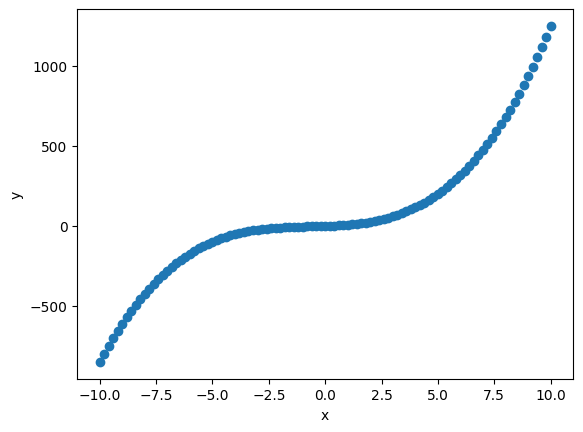

In [10]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Q3B-) Calculate Pearson’s R correlation coefficient between x and y (hint: use corr() method of data frame object)

In [11]:
pearson_R=df.corr(method='pearson')['x']['y']
pearson_R

0.9176711349421909

## Q3C-) Convert x and y values to rank order values and calculate Pearson’s R correlation coefficient on these rank values (hint: use rank() method of data frame object to create rank values)


In [12]:
df_rank=df.rank(method='min')
df_rank

,x,y
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,4.0,4.0
4,5.0,5.0
...,...,...
96,97.0,97.0
97,98.0,98.0
98,99.0,99.0
99,100.0,100.0


In [13]:
pearson_R_ranked=df_rank.corr(method='pearson')['x']['y']
pearson_R_ranked

1.0

## Q3D-) Now calculate Spearman rank correlation coefficient using corr method. (hint: use method parameter of corr() method). Compare this result to previously calculated correlation values in (b) and (c).

In [14]:
spearman_rank_corr=df.corr(method='spearman')['x']['y']
spearman_rank_corr

1.0

### COMMENT: In both rank correlations, coefficient was given as 1.0

## Q4-) Using the dataframe you created in question 3 answer the below questions.
## Q4A-) Generate normal random numbers with mean 0 and standard deviation 100 and add it to y values in the dataframe. 

In [15]:
np.random.seed(100)
std_deviation=np.random.normal(loc=0, scale=100, size=len(df))
df['new_y']=df['y']+std_deviation
df

,x,y,new_y
0,-10.0,-849.000,-1023.976547
1,-9.8,-797.112,-762.843960
2,-9.6,-747.416,-632.112420
3,-9.4,-699.864,-725.107604
4,-9.2,-654.408,-556.275921
...,...,...,...
96,9.2,994.968,987.365653
97,9.4,1055.304,1055.699759
98,9.6,1118.056,1099.554589
99,9.8,1183.272,934.556846


## Q4B-) Create a scatter plot of x and y values to see the effect of adding this error term.

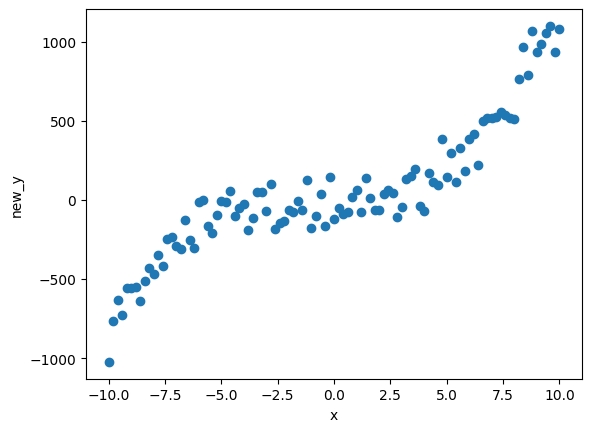

In [16]:
plt.scatter(df['x'], df['new_y'])
plt.xlabel('x')
plt.ylabel('new_y')
plt.show()

In [17]:
pearson_R=df.corr(method='pearson')['x']['new_y']
pearson_R

0.8909992216043824

## Q4C-) Using statsmodels package formula interface fit an OLS linear regression model. Predict values for the training and calculate errors. Answer d and e.

In [18]:
ols_model=ols('new_y~ x', data=df).fit()
df['predicted_y']=ols_model.predict(df)
df['calculated_errors']=df['new_y']-df['predicted_y']

In [19]:
df['predicted_y']

0     -588.704165
1     -575.790106
2     -562.876047
3     -549.961988
4     -537.047930
          ...    
96     651.045481
97     663.959540
98     676.873598
99     689.787657
100    702.701716
Name: predicted_y, Length: 101, dtype: float64

In [20]:
df['calculated_errors']

0     -435.272383
1     -187.053854
2      -69.236373
3     -175.145615
4      -19.227992
          ...    
96     336.320173
97     391.740220
98     422.680990
99     244.769189
100    377.833163
Name: calculated_errors, Length: 101, dtype: float64

## Q4D-) Plot both the predicted y values and actual y values against x values. Interpret the plot.

<AxesSubplot: title={'center': 'predicted_y vs.x'}, xlabel='x', ylabel='predicted_y'>

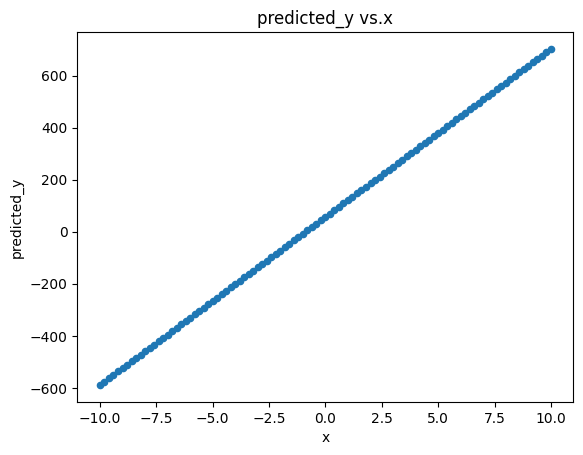

In [21]:
df.plot.scatter(x='x', y='predicted_y', title='predicted_y vs.x')

In [22]:
pearson_R=df.corr(method='pearson')['x']['predicted_y']
pearson_R

1.0000000000000002

<AxesSubplot: title={'center': 'new_y vs.x'}, xlabel='x', ylabel='new_y'>

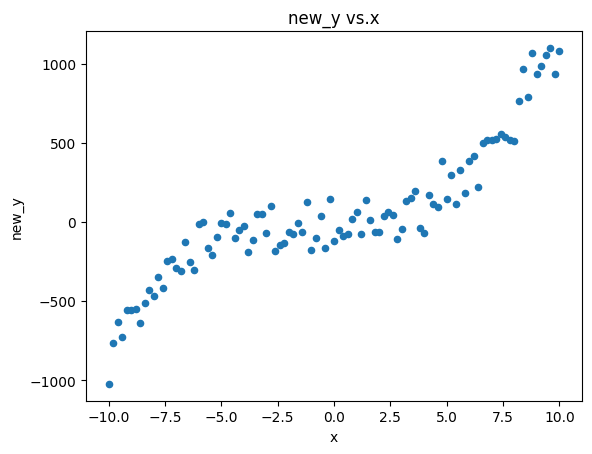

In [23]:
df.plot.scatter(x='x', y='new_y', title='new_y vs.x')

In [24]:
pearson_R=df.corr(method='pearson')['x']['new_y']
pearson_R

0.8909992216043824

### COMMENT: Pearson coefficient shows perfect correlation and there's a positive correlation between two variables.

## Q4E-) Plot predicted y values against actual y values. Interpret the plot.

<AxesSubplot: title={'center': 'predicted_y vs. new_y'}, xlabel='predicted_y', ylabel='new_y'>

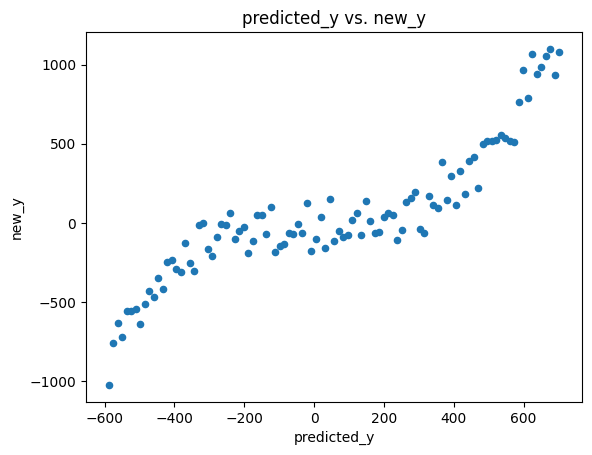

In [25]:
df.plot.scatter(x='predicted_y', y='new_y', title='predicted_y vs. new_y')

In [26]:
pearson_R=df.corr(method='pearson')['predicted_y']['new_y']
pearson_R

0.8909992216043822

### COMMENT: Once again we can observe a strong correlation between the variables.

## Q4F-) Plot errors against actual y values. Interpret the plot.

<AxesSubplot: title={'center': 'calculated_errors vs. new_y'}, xlabel='calculated_errors', ylabel='new_y'>

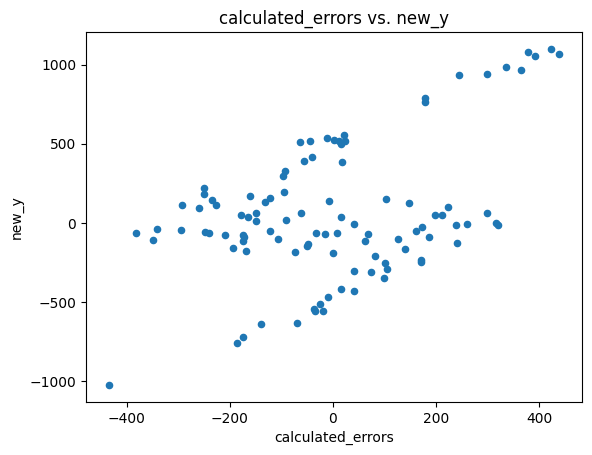

In [27]:
df.plot.scatter(x='calculated_errors', y='new_y', title='calculated_errors vs. new_y')

In [28]:
pearson_R=df.corr(method='pearson')['calculated_errors']['new_y']
pearson_R

0.4540048315826439

### COMMENT: Correlation is now weaker compared to before results.

## Q4G-) Using statsmodels package formula interface fit an OLS linear regression model with 2nd and 3rd order polynomial terms. Predict values for the training and calculate errors.

In [29]:
ols_model=ols('y ~ x + I(x**2) + I(x**3)', data=df).fit()
df['predicted_y']=ols_model.predict(df)
df['calculated_errors']=df['new_y']-df['predicted_y']

In [30]:
df['predicted_y']

0      -849.000
1      -797.112
2      -747.416
3      -699.864
4      -654.408
         ...   
96      994.968
97     1055.304
98     1118.056
99     1183.272
100    1251.000
Name: predicted_y, Length: 101, dtype: float64

In [31]:
df['calculated_errors']

0     -174.976547
1       34.268040
2      115.303580
3      -25.243604
4       98.132079
          ...    
96      -7.602347
97       0.395759
98     -18.501411
99    -248.715154
100   -170.465121
Name: calculated_errors, Length: 101, dtype: float64

## Q4H-) Plot both the predicted y values and actual y values against x values. Interpret the plot.

<AxesSubplot: title={'center': 'predicted_y vs.x'}, xlabel='x', ylabel='predicted_y'>

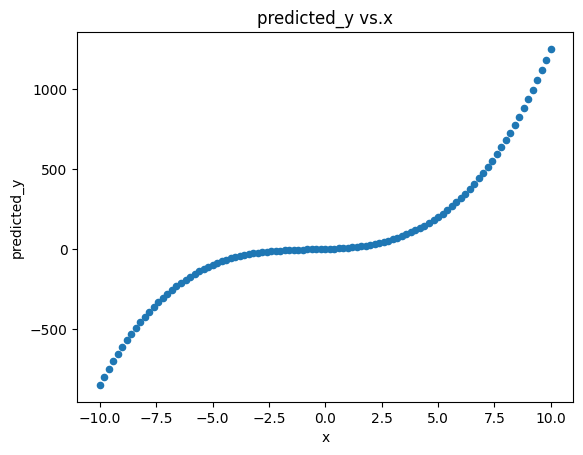

In [32]:
df.plot.scatter(x='x', y='predicted_y', title='predicted_y vs.x')

In [33]:
pearson_R=df.corr(method='pearson')['x']['predicted_y']
pearson_R

0.9176711349421908

<AxesSubplot: title={'center': 'new_y vs.x'}, xlabel='x', ylabel='new_y'>

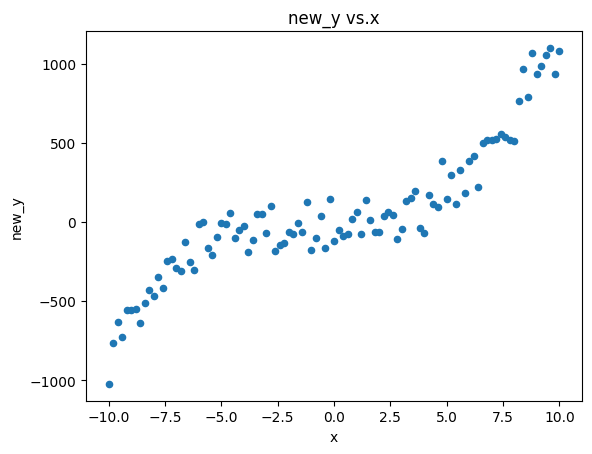

In [34]:
df.plot.scatter(x='x', y='new_y', title='new_y vs.x')

In [35]:
pearson_R=df.corr(method='pearson')['x']['new_y']
pearson_R

0.8909992216043824

### COMMENT: We can once again observe a strong correlation close to 1.0 and a strong correlation between the variables.

## Q4I-) . Plot predicted y values against actual y values. Interpret the plot.

<AxesSubplot: title={'center': 'predicted_y vs. new_y'}, xlabel='predicted_y', ylabel='new_y'>

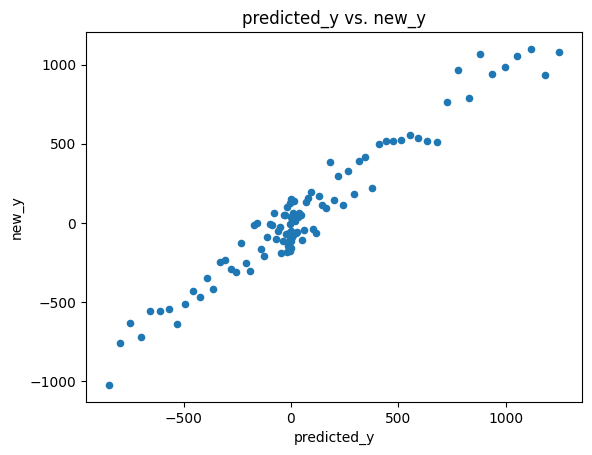

In [36]:
df.plot.scatter(x='predicted_y', y='new_y', title='predicted_y vs. new_y')

In [37]:
pearson_R=df.corr(method='pearson')['predicted_y']['new_y']
pearson_R

0.9731096007924704

### COMMENT: Correlation is stronger, drifting closer to 1.0

### Q4J-) Plot errors against actual y values. Interpret the plot.

<AxesSubplot: title={'center': 'calculated_errors vs. new_y'}, xlabel='calculated_errors', ylabel='new_y'>

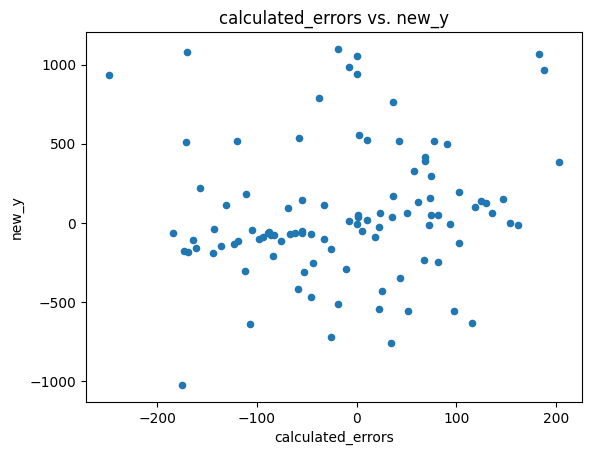

In [38]:
df.plot.scatter(x='calculated_errors', y='new_y', title='calculated_errors vs. new_y')

In [39]:
pearson_R=df.corr(method='pearson')['calculated_errors']['new_y']
pearson_R

0.1358793370889687

### COMMENT: Error terms prompted weak correlation between the variables.